<a href="https://colab.research.google.com/github/moritzfaller/Software-Entwicklung-und-Datenanalyse-in-Python/blob/main/Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Input

In [ ]:
# Install packages

!pip install spotipy
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

In [66]:
# Authentification
!pip install --upgrade spotipy
cid = 'ea1465c2df0a47179571e9426cd72098'
secret = 'f209c6669caa4051bff58e66407c01ac'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


TypeError: ignored

In [59]:
track= input('Enter track name here: ')
artist= input('Enter artist name here: ')

track_id = sp.search(q='artist:' + artist + ' track:' + track, type='track')
track_id = track_id['tracks']['items'][0]['id']

track_data = sp.audio_features(track_id)
track_data = pd.DataFrame(track_data)
track_data = track_data.drop(columns=['track_href', 'type','analysis_url', 'id', 'uri'])

std_scaler = StandardScaler()
data_features_nonscaled = data_full.iloc[:,:-1]
data_features = std_scaler.fit_transform(data_features_nonscaled)

label = gbc_classifier.predict(data_features)
print(labels)

Enter track name here: Lonely World
Enter artist name here: Moses Sumney


AttributeError: ignored

In [ ]:
Moses Sumney'
track= 'Lonely World'

# General

In [2]:
# install packages

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix

# visualisation

pd.set_option('display.width', 700)
pd.options.display.max_colwidth = 100
np.set_printoptions(linewidth=800)
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 500)

In [3]:
# clones public repo to colab

# deletes folder named 'colab_files'
!rm -rf 'colab_files'

# creates a colab directory which is identical to github repo
!git clone https://github.com/jeremykleindienst/colab_files.git

# loads dataset to variable data_full
data_full = pd.read_csv('/content/colab_files/df_model.csv')

Cloning into 'colab_files'...
remote: Enumerating objects: 2219, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (124/124), done.
remote: Total 2219 (delta 7), reused 97 (delta 0), pack-reused 2095
Receiving objects: 100% (2219/2219), 135.58 MiB | 21.33 MiB/s, done.
Resolving deltas: 100% (57/57), done.
Checking out files: 100% (2106/2106), done.


In [4]:
#function to get proper feature-importance-plot from the Model, can be used for every different model we use

import matplotlib.pyplot as plt

def better_feature_importance_plot(feature_importances, col_names):
  data_df=[]
  for f, c in zip(feature_importances, col_names):
    my_tuple = (c,f)
    data_df.append(my_tuple)
  df = pd.DataFrame(data_df)
  df = df.set_index(0)
  plot = df.sort_values(by=1, ascending=False).plot(kind='bar')
  return plot

# Classification Models

In [ ]:
#data_full = data_full.drop('Unnamed: 0', axis = 1)

In [5]:
# Perform feature scaling via standardization (z-score normalization):

metric = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms', 'ysrelease']
categorial = ['Cis', 'D', 'Dis', 'E', 'F', 'Fis', 'G', 'Gis', 'A', 'Ais', 'B', '3/4', '4/4', '5/4','major']

std_scaler = StandardScaler()
data_features_nonscaled_metric = data_full.loc[:,metric]
data_features_categorial = data_full.loc[:,categorial]
#data_features_nonscaled = data_full.loc[:,['energy','valence','acousticness','speechiness','ysrelease']]
data_features = std_scaler.fit_transform(data_features_nonscaled_metric)
data_features = pd.DataFrame(data_features,columns=metric)
data_features = pd.concat([data_features, data_features_categorial],axis=1)
#data_full['mood_happy'] = np.where(data_full['Mood']=='happy',1,0)
target = data_full['mood']

In [6]:
# train and test split

X_train, X_test, y_train, y_test = train_test_split(data_features, target, test_size=0.3, random_state=24)

## Gradient Boosting Classifier

In [7]:
# train model (check accuracy)
gbc_classifier = GradientBoostingClassifier(random_state=24)
gbc_classifier.fit(X_train, y_train)
accuracy = gbc_classifier.score(X_test, y_test)
print(accuracy)

0.8607050730868444


In [8]:
# Get the prediction values for the test data and print a confusion matrix
y_test_predicted = gbc_classifier.predict(X_test)
print(confusion_matrix(y_test, y_test_predicted))

[[339  34  11]
 [ 26 320  38]
 [ 14  39 342]]


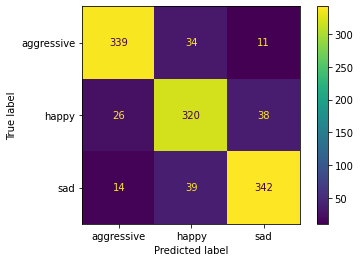

In [9]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

predictions = gbc_classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=gbc_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbc_classifier.classes_)
disp.plot()

plt.show()

In [10]:
from sklearn.metrics import classification_report
pred=gbc_classifier.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

  aggressive       0.89      0.88      0.89       384
       happy       0.81      0.83      0.82       384
         sad       0.87      0.87      0.87       395

    accuracy                           0.86      1163
   macro avg       0.86      0.86      0.86      1163
weighted avg       0.86      0.86      0.86      1163



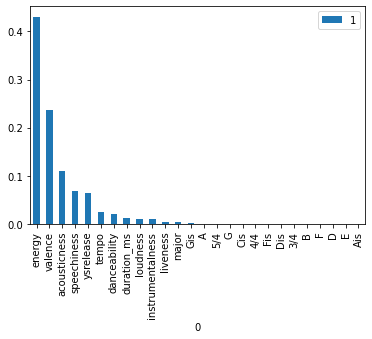

In [12]:
#write columns-names in variables and build a list with the feature-importance-score
col_names = list(data_features.columns)
fi = list(gbc_classifier.feature_importances_)

# returns the plot with the proper labels
df_fi = better_feature_importance_plot(fi,col_names)

### Hyperparametertuning for GradientBoostingClassifier

For tuning the GradientBoostingClassifier we use the following three parameters:
* n_estimators
* max_depth
* learning-rate

There are many more parameters but these three are seen as the most crucial in case of improving the score (cf. for example https://www.datacareer.de/blog/parameter-tuning-in-gradient-boosting-gbm/ and https://www.datasciencelearner.com/gradient-boosting-hyperparameters-tuning/)

Values for the Parameters have also been taken from https://www.datasciencelearner.com/gradient-boosting-hyperparameters-tuning/ to have a little guideline.

In [13]:
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}

In [ ]:
# Hyperparameter-Tuning with GridSearchCV (Caution! This may takes like 12 minutes)

from sklearn.model_selection import GridSearchCV
cv_gbc = GridSearchCV(gbc_classifier,parameters,cv=5)
cv_gbc.fit(X_train,y_train.values.ravel())
print(cv_gbc.best_params_)

In [ ]:
#function that transforms the different results to a dataframe to get a better overview

def cv_to_frame(results, name):
  mean_score = results.cv_results_['mean_test_score']
  std_score = results.cv_results_['std_test_score']
  params = results.cv_results_['params']
  
  lr=[]
  md=[]
  ne=[]
  name_list = []
  
  for i in range(len((results.cv_results_['params']))):
    lr.append(results.cv_results_['params'][i]['learning_rate'])
    md.append(results.cv_results_['params'][i]['max_depth'])
    ne.append(results.cv_results_['params'][i]['n_estimators'])
    name_list.append(name)

  df = pd.DataFrame([name_list, mean_score, std_score, lr, md, ne]).transpose()
  df.columns = ['Model','Mean_Score', 'Mean_Std', 'learning_rate','max_depth','n_estimators']
  df = df.sort_values(by='Mean_Score', ascending=False)
  return df

In [ ]:
cv_to_frame(cv_gbc, 'Gradient Boosting Classifier')

## Supporting Vector Classification (SVC)

In [ ]:
from sklearn.svm import SVC

In [ ]:
# SVC: train model (check accuracy)
svc_classifier = SVC(gamma = 2, C = 1, kernel='linear')
svc_classifier.fit(X_train, y_train)
svc_accuracy = svc_classifier.score(X_test, y_test)
print(svc_accuracy)

0.863225806451613


In [ ]:
y_test_predicted = svc_classifier.predict(X_test)
print(confusion_matrix(y_test, y_test_predicted))

[[362  23]
 [230 160]]


In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

predictions = svc_classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=svc_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svc_classifier.classes_)
disp.plot()

plt.show()

Text(0.5, 0, 'Permutation Importance')

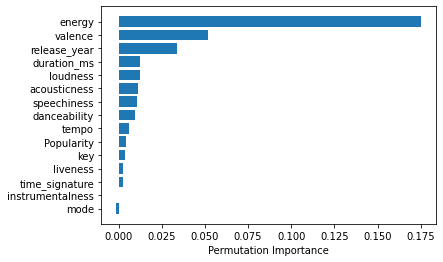

In [ ]:
# feature importance

from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

perm_importance = permutation_importance(svc_classifier, X_test, y_test)

feature_names = list(data_features_nonscaled.columns)
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

Parameters:
* Kernels
* C (penalty parameter)
* Gamma

https://www.vebuso.com/2020/03/svm-hyperparameter-tuning-using-gridsearchcv/

### Hyper Hyper Parameter Tuning - Manually

In [ ]:
p_gamma = [1, 0.1, 0.01, 0.001]
p_c = [0.1, 1, 10, 100]
p_kernel = ['rbf', 'linear', 'poly', 'sigmoid']

train_test = []
gamma = []
c = []
kernel = []
score = []

for g_value in p_gamma:
  for c_value in p_c:
    for k_value in p_kernel:
      svc_classifier = SVC(gamma = g_value, C = c_value, kernel=k_value)
      svc_classifier.fit(X_train, y_train)

      train = svc_classifier.score(X_train, y_train)
      train_test.append('train')
      gamma.append(g_value)
      c.append(c_value)
      kernel.append(k_value)
      score.append(train)

      test = svc_classifier.score(X_test, y_test)
      train_test.append('test')
      gamma.append(g_value)
      c.append(c_value)
      kernel.append(k_value)
      score.append(test)

result_df = pd.DataFrame()
result_df['train_test'] = train_test
result_df['gamma'] = gamma
result_df['C'] = c
result_df['kernel'] = kernel
result_df['score'] = score

print(result_df)

    train_test  gamma      C   kernel     score
0        train  1.000    0.1      rbf  0.501937
1         test  1.000    0.1      rbf  0.495484
2        train  1.000    0.1   linear  0.872717
3         test  1.000    0.1   linear  0.861935
4        train  1.000    0.1     poly  0.985058
..         ...    ...    ...      ...       ...
123       test  0.001  100.0   linear  0.861935
124      train  0.001  100.0     poly  0.501384
125       test  0.001  100.0     poly  0.496774
126      train  0.001  100.0  sigmoid  0.872717
127       test  0.001  100.0  sigmoid  0.861935

[128 rows x 5 columns]


In [ ]:
# best combination for train
print(result_df.sort_values(by=['score'], ascending=False).head(20))

    train_test  gamma      C kernel     score
28       train  1.000  100.0   poly  1.000000
24       train  1.000  100.0    rbf  1.000000
20       train  1.000   10.0   poly  0.999447
16       train  1.000   10.0    rbf  0.999447
12       train  1.000    1.0   poly  0.998340
..         ...    ...    ...    ...       ...
109       test  0.001    1.0   poly  0.496774
69        test  0.010    0.1   poly  0.496774
101       test  0.001    0.1   poly  0.496774
125       test  0.001  100.0   poly  0.496774
1         test  1.000    0.1    rbf  0.495484

[128 rows x 5 columns]


In [ ]:
# best combination for train
result_df_test = result_df.loc[result_df['train_test'] == 'train']
print(result_df_test.sort_values(by=['score'], ascending=False))

In [ ]:
# best combination for test
result_df_test = result_df.loc[result_df['train_test'] == 'test']
print(result_df_test.sort_values(by=['score'], ascending=False))

### Hyper Hyper Parameter Tuning - with Library

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

In [ ]:
print(grid.best_estimator_)

SVC(C=10, gamma=0.01)


In [ ]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[324  61]
 [ 43 347]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86       385
           1       0.85      0.89      0.87       390

    accuracy                           0.87       775
   macro avg       0.87      0.87      0.87       775
weighted avg       0.87      0.87      0.87       775



Text(0.5, 0, 'Permutation Importance')

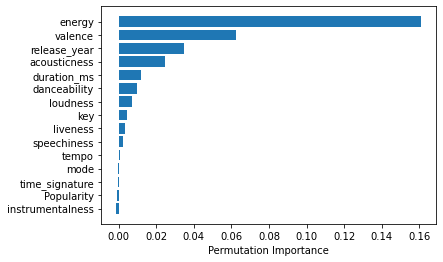

In [ ]:
# feature importance

from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

perm_importance = permutation_importance(grid, X_test, y_test)

feature_names = list(data_features_nonscaled.columns)
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

##K-Nearest-Neighbor (KNN)

###With Scikit-Learn

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [31]:
#to calculate distances, 3 distance metrics that are often used are Euclidean Distance, Manhattan Distance, and Minkowski Distance
#as we use Scikit-Learn, the default distance used is Euclidean

In [32]:
#create KNN object and train the model

knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_accuracy = knn_classifier.score(X_test, y_test)
print(knn_accuracy)

0.8082545141874462


In [29]:
y_test_predicted = knn_classifier.predict(X_test)
print(confusion_matrix(y_test, y_test_predicted))

[[332  42  10]
 [ 45 300  39]
 [ 27  60 308]]


In [33]:
#checking performance with classification report
print(classification_report(y_test, y_test_predicted))

              precision    recall  f1-score   support

  aggressive       0.82      0.86      0.84       384
       happy       0.75      0.78      0.76       384
         sad       0.86      0.78      0.82       395

    accuracy                           0.81      1163
   macro avg       0.81      0.81      0.81      1163
weighted avg       0.81      0.81      0.81      1163



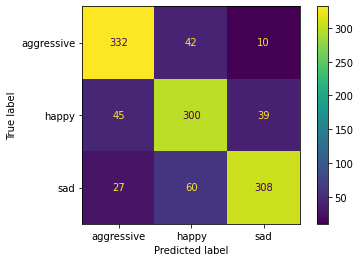

In [34]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

predictions = knn_classifier.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=knn_classifier.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn_classifier.classes_)
disp.plot()

plt.show()

In [39]:
#evaluating the model (Marian's way of evaluating - same output)

evaluate(knn_classifier, X_test, y_test)

              precision    recall  f1-score   support

  aggressive       0.82      0.86      0.84       384
       happy       0.75      0.78      0.76       384
         sad       0.86      0.78      0.82       395

    accuracy                           0.81      1163
   macro avg       0.81      0.81      0.81      1163
weighted avg       0.81      0.81      0.81      1163



From the classification report, it can be seen that the model has an average performance of around 81% ranging from precision, recall, f1-score and support. 

Accuracy also shows in value of 81%.

###Hyperparametertuning - KNN

https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f

In [40]:
#list of hyperparameters that we want to tune
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]

#convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#create new KNN object
knn_2 = KNeighborsClassifier()

#use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=10)

In [ ]:
#fit the model (caution: takes about 20min!)
best_model = clf.fit(data_features, target)

#print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 28


It can be seen that the best number of leaf_size is 1 while the optimal distance method is Manhattan or p = 1.
Then the most optimal number of K is 28.

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       385
           1       0.85      0.88      0.87       390

    accuracy                           0.86       775
   macro avg       0.86      0.86      0.86       775
weighted avg       0.86      0.86      0.86       775



Using Hyperparameters Tuning can improve model performance only by about 2% to a range of 86% for all evaluation matrices.

### Final Model

In [ ]:
#

## Random Forest


In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
accuracy = rf_classifier.score(X_test, y_test)
print(accuracy)

0.8495270851246776


### Hyperparametertuning - Random Forest

Due to the official Documentation of sklearn there are two crucial parameters that have to be tuned (cf. https://scikit-learn.org/stable/modules/ensemble.html#random-forest-parameters):
* n-estimators
* max-features

In this case we also wanted to tune with "max_depth". This parameter describes "The max_depth of a tree in Random Forest is defined as the longest path between the root node and the leaf node." (https://medium.com/analytics-vidhya/random-forest-classifier-and-its-hyperparameters-8467bec755f6)

In [44]:
parameters = {
    'n_estimators': [int(x) for x in np.linspace(start=10, stop=80,num=10)],
    'max_features': ['auto', 'sqrt','log2'],
    'max_depth': [2,4]
}

In [45]:
# Hyperparameter-Tuning with GridSearchCV

from sklearn.model_selection import GridSearchCV
cv_rf = GridSearchCV(rf_classifier,parameters,cv=5)
cv_rf.fit(X_train,y_train.values.ravel())
print(cv_rf.best_params_)

{'max_depth': 4, 'max_features': 'auto', 'n_estimators': 56}


In [46]:
#function that transforms the different results to a dataframe to get a better overview

def cv_to_frame(results, name):
  mean_score = results.cv_results_['mean_test_score']
  std_score = results.cv_results_['std_test_score']
  params = results.cv_results_['params']
  
  ne=[]
  mf=[]
  md=[]
  name_list = []
  
  for i in range(len((results.cv_results_['params']))):
    mf.append(results.cv_results_['params'][i]['max_features'])
    md.append(results.cv_results_['params'][i]['max_depth'])
    ne.append(results.cv_results_['params'][i]['n_estimators'])
    name_list.append(name)

  df = pd.DataFrame([name_list, mean_score, std_score, mf, md, ne]).transpose()
  df.columns = ['Model','Mean_Score', 'Mean_Std', 'max_features','max_depth','n_estimators']
  df = df.sort_values(by='Mean_Score', ascending=False)
  return df

In [47]:
cv_to_frame(cv_rf, 'RandomForestClassifier')

,Model,Mean_Score,Mean_Std,max_features,max_depth,n_estimators
36,RandomForestClassifier,0.823003,0.020732,auto,4,56
46,RandomForestClassifier,0.823003,0.020732,sqrt,4,56
45,RandomForestClassifier,0.821162,0.017433,sqrt,4,48
35,RandomForestClassifier,0.821162,0.017433,auto,4,48
37,RandomForestClassifier,0.820422,0.021561,auto,4,64
47,RandomForestClassifier,0.820422,0.021561,sqrt,4,64
48,RandomForestClassifier,0.820056,0.020568,sqrt,4,72
38,RandomForestClassifier,0.820056,0.020568,auto,4,72
59,RandomForestClassifier,0.820054,0.018712,log2,4,80
56,RandomForestClassifier,0.820053,0.016321,log2,4,56


# **Image Models**

## **CNN** (complex Code Marian)



In [ ]:
# get images from drive folder and split into train and test

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dataset = image_dataset_from_directory('/content/colab_files/spectograms', labels='inferred', validation_split=0.2, subset='training', label_mode='categorical', seed=42)
val_dataset = image_dataset_from_directory('/content/colab_files/spectograms', labels='inferred', validation_split=0.2, subset='validation', label_mode='categorical', seed=42)

Found 200 files belonging to 2 classes.
Using 160 files for training.
Found 200 files belonging to 2 classes.
Using 40 files for validation.


There's a lot to unpack here, so let's start:


*   `train` describes the folder from which keras should load images
*   `labels='inferred'` means that keras will take the target label for each image from the folder structure
*   `validation_split=0.2` means that keras will retain 20% for validation
*   `subset` determines whether keras returns the training or validation dataset
*   `label_mode='categorical'` means that the labels are encoded as categorical vectors
*   `seed` describes the random seed to be used, this has to be the same to ensure that each image is used only once in the training and test set



We can now start defining our model. As previously mentioned, we'll be using a CNN architecture. The architecture was taken from [this kaggle post](https://www.kaggle.com/abhinavkrjha/using-cnn-architecture-99-631-accuracy).

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

# again, we start with the Sequential() call
cnn = Sequential()

# add 4 layer pairs consisting of a convolution and max pooling layer
# the number of filters doubles with each layer to deal with the rising complexity of features
# the input shape in this case consists of our images size (256x256) with the color information (RGB = 3)
cnn.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(256,256,3), kernel_initializer='glorot_normal'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu', kernel_initializer='glorot_normal'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Conv2D(filters=256, kernel_size=2, padding='same', activation='relu', kernel_initializer='glorot_normal'))
cnn.add(MaxPooling2D(pool_size=2))
cnn.add(Conv2D(filters=512, kernel_size=2, padding='same', activation='relu', kernel_initializer='glorot_normal'))
cnn.add(MaxPooling2D(pool_size=2))

# add dropout for regularization
cnn.add(Dropout(0.5))
# flatten all activations into one vector
cnn.add(Flatten())
# final fully-connected hidden layer
cnn.add(Dense(500, activation='relu', kernel_initializer='glorot_normal'))
cnn.add(Dropout(0.5))
# output layer with 2 neurons (2 classes)
cnn.add(Dense(2, activation='softmax', kernel_initializer='glorot_normal'))

This architecture looks quite complex and it actually is (nothing compared to the size of architectures reaching state-of-the-art results, but still), but you can find many CNN architectures which will perform quite well on a range of different tasks. Often times, architectures that work very well for specific tasks (like this one) are created using a trial-and-error approach and hyperparameter optimization.

Because we defined the size of our inputs explicitly, we can already now plot the architecture of our model:

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(cnn, show_shapes=True,
    show_dtype=True)

We can also plot the architecture of a state-of-the-art CNN model (e.g. XCeption for the `imagenet` dataset): see [here](https://keras.io/api/applications/).

In [ ]:
xception = tf.keras.applications.Xception(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

plot_model(xception, show_shapes=True,
    show_dtype=True)

Now we're ready to prepare our model for training:

In [ ]:
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

We will also be using something called `early stopping`. In many cases, our model performance stops improving after a certain number of epochs. To speed up the training process, we can instruct keras to stop training when the performance of the model has not improved after a fixed number of epochs:

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss', # which metric keras should look at for deciding early stopping
    min_delta=0.01, # how much difference will be counted as an improvement; everything below will count as 'not improved'
    patience=3, # the number of epochs to wait for improvement before stopping
    verbose=0, 
    restore_best_weights=True # go back to the weights of the model with the best performance value after stopping
)

The callback has to be passed in during training. Note that training might take a while:

In [ ]:
# Caution: this takes ~25-45min

cnn_history = cnn.fit(train_dataset, 
                          validation_data = val_dataset, 
                          epochs=25, 
                          batch_size=32, # keras will push 32 images in one batch through the network for training
                          verbose=1, # print progress for each epoch
                          callbacks = [early_stopping])

Epoch 1/25
53/53 [==============================] - 627s 11s/step - loss: 206.3717 - accuracy: 0.5122 - val_loss: 0.6930 - val_accuracy: 0.5643
Epoch 2/25
53/53 [==============================] - 542s 10s/step - loss: 4.4191 - accuracy: 0.5253 - val_loss: 0.6682 - val_accuracy: 0.7119
Epoch 3/25
53/53 [==============================] - 525s 10s/step - loss: 2.0001 - accuracy: 0.5134 - val_loss: 0.7067 - val_accuracy: 0.4357
Epoch 4/25
53/53 [==============================] - 527s 10s/step - loss: 0.7826 - accuracy: 0.4985 - val_loss: 0.6932 - val_accuracy: 0.4357
Epoch 5/25
53/53 [==============================] - 522s 10s/step - loss: 0.6934 - accuracy: 0.4860 - val_loss: 0.6932 - val_accuracy: 0.4357


Analysis over time:

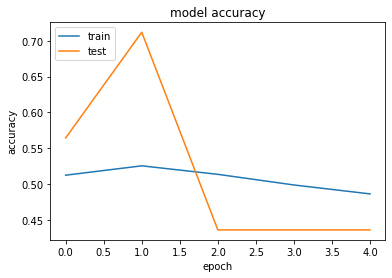

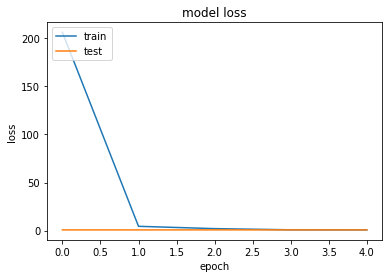

In [ ]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(cnn_history.history['accuracy'])
plt.plot(cnn_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(cnn_history.history['loss'])
plt.plot(cnn_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

The difference in accuracy/loss between train and test is probably caused by the dropout layers which are only active during training but not during testing.


Let's take a closer look at the model performance. For that, we first have to retrieve the actual predictions using the following code:

In [ ]:
import numpy as np
predictions = np.array([])
labels =  np.array([])

# we have to iterate over the dataset and get the predictions for each example individually
for x, y in val_dataset:
  predictions = np.concatenate([predictions, np.argmax(cnn.predict(x), axis=-1)])
  labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

Now we can print the classification report:

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(labels, predictions))

              precision    recall  f1-score   support

         0.0       0.62      0.89      0.73       183
         1.0       0.87      0.58      0.69       237

    accuracy                           0.71       420
   macro avg       0.74      0.73      0.71       420
weighted avg       0.76      0.71      0.71       420



## **CNN for tuning**

https://keras.io/keras_tuner/

https://www.youtube.com/watch?v=Clo1HKB50Ug

In [48]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [49]:
categories=['happy','sad']
flat_data_arr=[] #input array
target_arr=[] #output array

datadir='/content/colab_files/spectograms' 
#path which contains all the categories of images

In [50]:
for i in categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : happy


KeyboardInterrupt: ignored

In [ ]:
flat_data=np.array(flat_data_arr)

target=np.array(target_arr)

df=pd.DataFrame(flat_data) #dataframe
df['Target']=target

x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1682, 67500)
(1682,)
(421, 67500)
(421,)


### Model + Tuning

In [ ]:
!pip install keras-tuner
import keras_tuner as kt
from tensorflow import keras

In [ ]:
!rm -rf 'cnn_model'

In [ ]:
# model with varying parameters:
# number of hidden layers, number of neurons per layer, activation function, learning rate

def build_model(hp):
  model = keras.Sequential()

  for i in range(hp.Int('layers',2,6)):
      model.add(keras.layers.Dense(
          units = hp.Int('units_'+str(i), 50, 100, step=10),
          activation=hp.Choice('act_'+str(i),['relu','sigmoid'])))

  model.add(keras.layers.Dense(2, activation='softmax'))
  model.compile(optimizer=keras.optimizers.Adam(
                  hp.Choice('learning_rate',values=[0.01, 0.001])),
                loss = 'mse',
                metrics=['accuracy'])
  return model

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective= kt.Objective("val_accuracy", direction="max"),
    max_trials=5,
    executions_per_trial = 3, # we try 5 times, in each try there are 3 models; saves time
    directory = 'cnn_model3',
    project_name = 'model3')

In [ ]:
tuner.search_space_summary() 

In [ ]:
tuner.search(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Trial 5 Complete [00h 00m 52s]
val_accuracy: 0.5154394507408142

Best val_accuracy So Far: 0.5154394507408142
Total elapsed time: 00h 05m 00s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

Results summary
Results in cnn_model3/model3
Showing 10 best trials
Trial summary
Hyperparameters:
layers: 4
units_0: 60
act_0: sigmoid
units_1: 80
act_1: sigmoid
learning_rate: 0.001
units_2: 80
act_2: sigmoid
units_3: 50
act_3: relu
Score: 0.5154394507408142
Trial summary
Hyperparameters:
layers: 3
units_0: 80
act_0: relu
units_1: 50
act_1: sigmoid
learning_rate: 0.01
units_2: 50
act_2: relu
units_3: 90
act_3: sigmoid
Score: 0.5154394507408142
Trial summary
Hyperparameters:
layers: 2
units_0: 90
act_0: relu
units_1: 60
act_1: relu
learning_rate: 0.001
Score: 0.5051464935143789
Trial summary
Hyperparameters:
layers: 3
units_0: 80
act_0: relu
units_1: 100
act_1: relu
learning_rate: 0.001
units_2: 50
act_2: relu
Score: 0.49485353628794354
Trial summary
Hyperparameters:
layers: 2
units_0: 80
act_0: relu
units_1: 60
act_1: relu
learning_rate: 0.01
units_2: 50
act_2: relu
Score: 0.49485353628794354


## **SVM** 

https://medium.com/analytics-vidhya/image-classification-using-machine-learning-support-vector-machine-svm-dc7a0ec92e01

In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
categories=['happy','sad']
flat_data_arr=[] #input array
target_arr=[] #output array

datadir='/content/colab_files/spectograms'
#path which contains all the categories of images

In [ ]:
for i in categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : happy
loaded category:happy successfully
loading... category : sad
loaded category:sad successfully


In [ ]:
flat_data=np.array(flat_data_arr)

target=np.array(target_arr)

df=pd.DataFrame(flat_data) #dataframe
df['Target']=target

x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

### **Model + Tuning**

In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

In [ ]:
param_grid = {'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc = svm.SVC(probability=True)
model = GridSearchCV(svc,param_grid)

In [ ]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)

Splitted Successfully


In [ ]:
model.fit(x_train,y_train)

# model.best_params_ contains the best parameters obtained from GridSearchCV

In [ ]:
# try without tuning
model = svm.SVC()
model.fit(x_train, y_train)
svc_accuracy = model.score(x_test, y_test)
print(svc_accuracy)

0.7387173396674585


In [ ]:
y_pred = model.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[172  32]
 [ 78 139]]
              precision    recall  f1-score   support

           0       0.69      0.84      0.76       204
           1       0.81      0.64      0.72       217

    accuracy                           0.74       421
   macro avg       0.75      0.74      0.74       421
weighted avg       0.75      0.74      0.74       421



In [ ]:
# Get user input and predict category

url=input('Enter URL of Image :')
img=imread(url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

# User-Input + Prediction which label

In [56]:
!pip install spotipy
import spotipy as sp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [58]:
artist= 'Moses Sumney'
track= 'Lonely World'
track_id = sp.spotify.search(q='artist:' + artist + ' track:' + track, type='track')

AttributeError: ignored

In [53]:
user_input = input('Enter your song-name here:')



artist= 'Moses Sumney'
track= 'Lonely World'
track_id = sp.search(q='artist:' + artist + ' track:' + track, type='track')

Enter your song-name here:Teenage Dirtbag
Teenage Dirtbag - Cooler Song
